# Predicting future outcomes for Turtle Games

#### Turtle Games is a global game manufacturer and retailer that sells a range of products, including books, board games, video games, and toys, both from their own brand and third-party manufacturers. The company collects data from sales and customer reviews to analyse trends and improve overall sales performance.

### Business questions

#### 1.Turtle Games has identified the following business questions to improve sales performance:

#### 2.How do customers engage with and accumulate loyalty points?

#### 3.How can customers be segmented, and which groups should be targeted by marketing?

#### 4.How can text data (e.g., customer reviews) inform marketing campaigns and business improvements?

#### 5.Can descriptive statistics provide insights into the loyalty points data for predictive modeling (e.g., normal distribution, skewness, kurtosis)?

### Approach

###### To address the business questions posed by Turtle Games, I will follow a systematic approach using Python and R to analyse real-world data. The steps are as follows:

###### Data Collection and Cleaning: Import and clean the available data, addressing any missing values, outliers, or inconsistencies.

###### Exploratory Data Analysis (EDA): Utilize Python and R for data exploration, creating visualizations like histograms, box plots, and correlation heatmaps to identify patterns and trends in the data.

###### Customer Segmentation: Use clustering techniques such as K-means or hierarchical clustering to segment customers based on purchase behavior and loyalty point accumulation. This will help identify targetable groups for marketing.

###### Text Data Analysis: Perform sentiment analysis using a word cloud to analyze customer reviews and social media data. This will inform marketing strategies and provide insights for business improvements.

###### Descriptive Statistics: Apply descriptive statistics, such as mean, median, skewness, and kurtosis, to assess the distribution of loyalty points data and its suitability for predictive modeling.

###### Predictive Modeling: Develop a linear regression model to predict customer behavior, such as loyalty point accumulation and engagement. Evaluate the model's performance using metrics like R-squared and mean squared error (MSE).


###### Model Validation: Validate the model’s performance using cross-validation techniques and assess its generalisability to ensure robust predictions.

### Step 1: Import necessary libraries and packages

##### Explanation: This is where all the essential packages are imported, including pandas for data handling, seaborn and matplotlib for visualisation, and sklearn for performing regression.

In [118]:
# Import necessary libraries
import pandas as pd         # For handling data
import numpy as np          # For numerical operations
import seaborn as sns       # For data visualization
import matplotlib.pyplot as plt  # For creating plots
from sklearn.linear_model import LinearRegression  # For performing linear regression
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model's performance
import statsmodels.api as sm  # For extended analysis using OLS (Ordinary Least Squares)


### Step 2: Load the data and explore the dataset

##### Explanation: to load the dataset, check the first few rows, and inspect the metadata to ensure the data is loaded correctly. I am also checking for any missing values. I have used the  display() function instead of print() to provide better output visibility in Jupyter Notebooks.

In [119]:
# Load the turtle_reviews.csv file into a pandas DataFrame
df = pd.read_csv('turtle_reviews.csv')

# Display the first few rows of the dataset to inspect the structure and ensure it's loaded correctly
display(df.head())

# Check the data types of each column and general metadata of the DataFrame
display(df.info())

# Check for missing values to ensure data quality
missing_values = df.isnull().sum()
display(missing_values)


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


None

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

#### Summary of the data loading and exploring

The dataset contains 2000 entries and 11 columns, including both numerical (age, remuneration, spending_score, loyalty_points, product) and categorical (gender, education, language, platform, review, summary) data. There are no missing values, and all columns have appropriate data types. The dataset uses 172.0+ KB of memory and is well-structured for analysis. Next, we'll explore variable relationships and address business questions.



#### Columns like age, remuneration, spending score, loyalty points, product, and review will be used to analyze customer loyalty and build predictive models, while less relevant ones like platform and language will be excluded to reduce complexity. Gender and education are kept as they may influence behavior, though multicollinearity should be checked to ensure reliable model predictions.

 ### Step 3: Summary statistics and data cleaning
 
 Summary statistics will be run only for relevant columns to focus the analysis on factors that impact customer loyalty. The df.describe() function generates statistics for numerical data, while df.drop() removes irrelevant columns like 'language' and 'platform,' and df.rename() ensures clarity in column names.

In [120]:
# Create a summary of descriptive statistics for numerical columns
def generate_descriptive_stats(df):
    """
    Generate and display summary statistics for numerical columns in the DataFrame.

    This function uses the `describe()` method to calculate key statistical measures
    (such as mean, standard deviation, minimum, and maximum) for all numerical columns
    in the DataFrame. It provides a quick overview of the distribution of numerical data.

    Args:
    df (DataFrame): The input DataFrame containing the data to analyze.

    Returns:
    None
    """
    descriptive_stats = df.describe()
    display(descriptive_stats)

# Remove redundant columns such as 'language' and 'platform' that are not needed for the analysis
def remove_redundant_columns(df):
    """
    Remove unnecessary columns from the DataFrame.

    This function removes the specified columns (e.g., 'language', 'platform') from the DataFrame
    to focus on the relevant data for analysis, ensuring the dataset is streamlined for the analysis process.

    Args:
    df (DataFrame): The input DataFrame from which columns will be removed.

    Returns:
    DataFrame: The cleaned DataFrame with the specified columns removed.
    """
    df_cleaned = df.drop(columns=['language', 'platform'])
    return df_cleaned

# Rename columns to make them easier to work with and more meaningful
def rename_columns(df):
    """
    Rename columns to make them more intuitive and easier to reference.

    This function renames the columns in the DataFrame to more descriptive names,
    which can make the analysis and code clearer and more maintainable.

    Args:
    df (DataFrame): The input DataFrame with columns to be renamed.

    Returns:
    DataFrame: The DataFrame with renamed columns.
    """
    df_cleaned = df.rename(columns={'remuneration': 'remuneration_amount', 
                                    'spending_score': 'spending_score'})
    return df_cleaned

# Display the cleaned data to confirm changes
def display_cleaned_data(df):
    """
    Display the first few rows of the cleaned DataFrame.

    This function is used to verify that the necessary changes (e.g., dropped columns, renamed columns)
    have been applied correctly to the dataset before proceeding with further analysis.

    Args:
    df (DataFrame): The cleaned DataFrame to display.

    Returns:
    None
    """
    display(df.head())

# Call the functions in order to execute the steps
generate_descriptive_stats(df)  # Generate and display the descriptive statistics
df_cleaned = remove_redundant_columns(df)  # Remove redundant columns
df_cleaned = rename_columns(df_cleaned)  # Rename columns for clarity
display_cleaned_data(df_cleaned)  # Display the cleaned DataFrame


,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


### Key findings of the descriptive statistics

#### Age: Ranges from 17 to 72 years (mean: 39.5, std: 13.6). The range of 55 years shows a broad customer base, with a higher concentration of customers between 29 and 49 years (25th to 75th percentile).

#### Remuneration (k£): Varies from £12.3k to £112.34k (mean: £48.08k, std: £23.12). The wide range indicates significant income diversity, with most customers earning between £30.34k and £63.96k.

#### Spending Score (1-100): Scores range from 1 to 99 (mean: 50, std: 26.1). The spread suggests varied spending behaviors, with most scores between 32 and 73 (25th to 75th percentile).

#### Loyalty Points: Ranges from 25 to 6847 points (mean: 1578, std: 1283.2). Most customers accumulate between 772 and 1751 points, showing significant variation in engagement.

#### Product: Product numbers range from 107 to 11086 (mean: 4320.5, std: 3148.94). Most products reviewed fall between 1589 and 6654.

### These variations highlight diverse customer behaviour, crucial for loyalty analysis.

### Step 4: To save the cleaned data set for future use.

In [121]:
# Save the cleaned DataFrame to a new CSV file for future use
def save_cleaned_data(df, filename):
    """
    Save the cleaned DataFrame to a CSV file.

    This function exports the DataFrame to a CSV file, which allows for future use 
    of the cleaned data without having to reprocess the raw dataset.

    Args:
    df (DataFrame): The cleaned DataFrame to be saved.
    filename (str): The name of the CSV file where the cleaned DataFrame will be saved.

    Returns:
    None
    """
    df.to_csv(filename, index=False)
    print(f"Cleaned data saved to {filename}")

# Reload the cleaned data to ensure the changes were saved properly
def reload_cleaned_data(filename):
    """
    Reload the cleaned DataFrame from a CSV file.

    This function reloads the cleaned data from a saved CSV file to verify that 
    the data has been saved and can be accessed correctly for further analysis.

    Args:
    filename (str): The name of the CSV file from which to load the cleaned data.

    Returns:
    DataFrame: The reloaded cleaned DataFrame.
    """
    df_reloaded = pd.read_csv(filename)
    display(df_reloaded.info())
    return df_reloaded

# Save the cleaned data and reload it to verify
save_cleaned_data(df_cleaned, 'cleaned_turtle_reviews.csv')  # Save the cleaned data
df_cleaned_reloaded = reload_cleaned_data('cleaned_turtle_reviews.csv')  # Reload the cleaned data


Cleaned data saved to cleaned_turtle_reviews.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


None

### Explanation of the summary 


Numeric Columns:

age, remuneration (k£), spending_score (1-100), and loyalty_points provide continuous data for analysis.

Categorical Columns:

gender and education are categorical, likely influencing behavior related to loyalty points.

product is a numeric column, but it might represent categories like product types or categories.

review and summary contain textual data that may not be directly useful for regression analysis but could be leveraged for sentiment analysis or text mining.

This structure allows for a range of analyses, such as regression to identify key factors affecting loyalty points accumulation, and examining the relationships between categorical variables (like gender and education) and numerical variables (such as spending score or remuneration).




### Step 5: To detect outliers.

Outliers can distort models, so they are detected using visual methods (e.g., pair plots, boxplots) and statistical techniques (Z-score, IQR). Removing outliers ensures clean data, improving customer behavior analysis and the accuracy of predictive models for forecasting loyalty points.

In [122]:
# Clean column names (remove spaces and convert to lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')



In [123]:
# Define the correct variables based on the cleaned column names
variables = ['remuneration_(k£)', 'spending_score_(1-100)', 'loyalty_points']


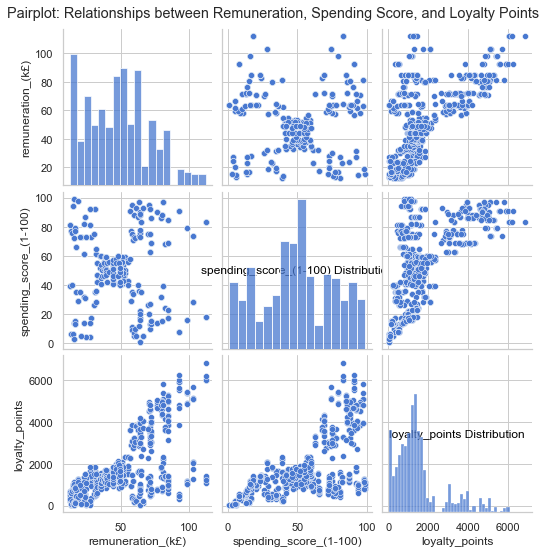

In [124]:
# Function to create a pairplot with annotations
def create_pairplot_with_annotations(data, variables):
    """
    Creates a pairplot of the specified variables from the dataset with annotations
    to describe the relationships between the variables.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    variables (list): List of variables (column names) to include in the pairplot.
    
    Returns:
    None: Displays the pairplot with annotations.
    """
    # Create the pairplot using seaborn
    pairplot = sns.pairplot(data[variables])

    # Adding a title with a specific position above the plot
    plt.suptitle('Pairplot: Relationships between Remuneration, Spending Score, and Loyalty Points', y=1.02)

    # Annotating the diagonal to indicate the type of variable
    for i in range(len(variables)):
        pairplot.axes[i, i].annotate(f'{variables[i]} Distribution', 
                                     (0.5, 0.5), 
                                     textcoords='axes fraction', 
                                     xytext=(0.5, 0.5),  # Specifying the location of the text relative to the axes
                                     ha='center', va='center', fontsize=12, color='black')

    # Display the plot
    plt.show()

# Call the function to create the pairplot
create_pairplot_with_annotations(df, variables)


### Explanation

The pairplot shows distributions and relationships between variables:

Remuneration (£K): Clustered between £20K-£80K

Spending Score (1-100): Mostly centered around 40-60

Loyalty Points: Most customers have 0-2000 points

Scatter plots reveal:

Remuneration vs. Spending Score: No strong linear relationship

Remuneration vs. Loyalty Points: Moderate positive correlation

Spending Score vs. Loyalty Points: Positive correlation

Key patterns suggest customer segments, outliers with high loyalty points, and complex relationships. This helps with segmentation and understanding customer behavior.

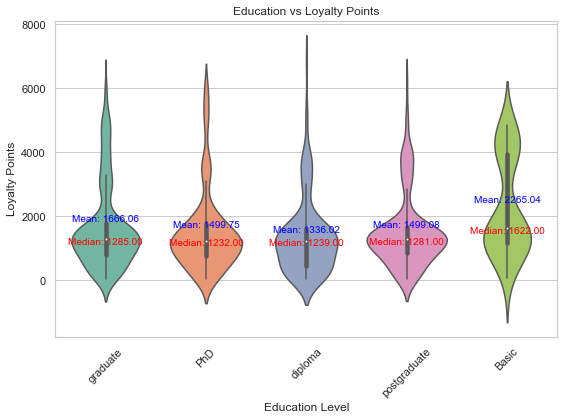

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_violin_education_vs_loyalty(education, loyalty_points):
    """
    Plots a violin plot showing the distribution of Loyalty Points across different Education levels.
    
    Parameters:
    education (array-like): Categorical data representing the education levels of customers.
    loyalty_points (array-like): Numerical data representing the loyalty points of customers.
    """
    # Create a violin plot for Education vs Loyalty Points
    fig, ax = plt.subplots(figsize=(8, 6))

    # Violin plot to visualize the distribution of Loyalty Points for each Education level
    sns.violinplot(x=education, y=loyalty_points, ax=ax, palette='Set2')

    # Adding labels and title
    ax.set_title('Education vs Loyalty Points')
    ax.set_xlabel('Education Level')
    ax.set_ylabel('Loyalty Points')

    # Annotate with the mean and median of each category
    for i, edu in enumerate(education.unique()):
        # Get the data points for this education level
        edu_data = loyalty_points[education == edu]
        
        # Calculate mean and median
        mean_val = edu_data.mean()
        median_val = edu_data.median()
        
        # Annotate mean and median on the plot
        ax.annotate(f'Mean: {mean_val:.2f}', xy=(i, mean_val), xycoords='data', textcoords="offset points", xytext=(0, 5), ha='center', color='blue', fontsize=10)
        ax.annotate(f'Median: {median_val:.2f}', xy=(i, median_val), xycoords='data', textcoords="offset points", xytext=(0, -5), ha='center', color='red', fontsize=10)
    
    # Show the plot with rotated labels for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_violin_education_vs_loyalty(df['education'], df['loyalty_points'])


### Explanation

This image shows a violin plot displaying the relationship between Education Level and Loyalty Points.

The plot compares loyalty points distribution across five different education levels:

Graduate
PhD
Diploma
Postgraduate
Basic
Key observations:

The violin plot shows loyalty point distribution across education levels: Basic (mean: 3255, median: 3022) has the highest, while Diploma (mean: 1330, median: 1230) has the lowest. Graduate (mean: 2036, median: 1985) and PhD (mean: 2490, median: 2232) fall in between, with all groups showing multimodal distributions and outliers (6000-7000 points).


### Distribution of variables

Histograms visualise data distribution, central tendency, outliers, and variability, making it easy to spot patterns. They also allow for comparison with normal distribution, aiding in intuitive analysis.

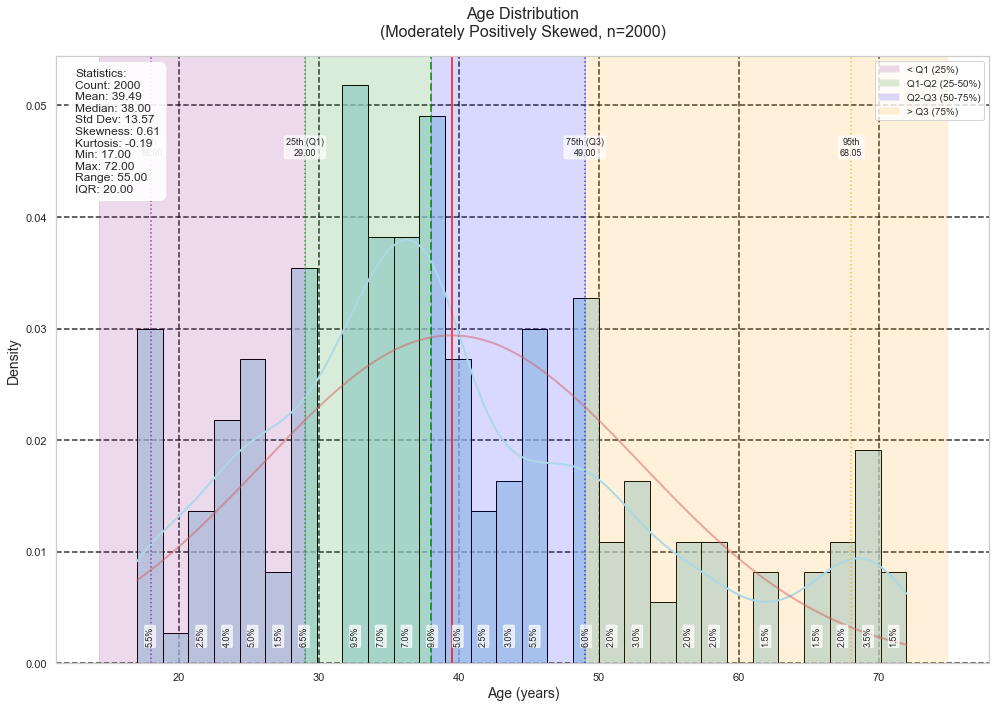

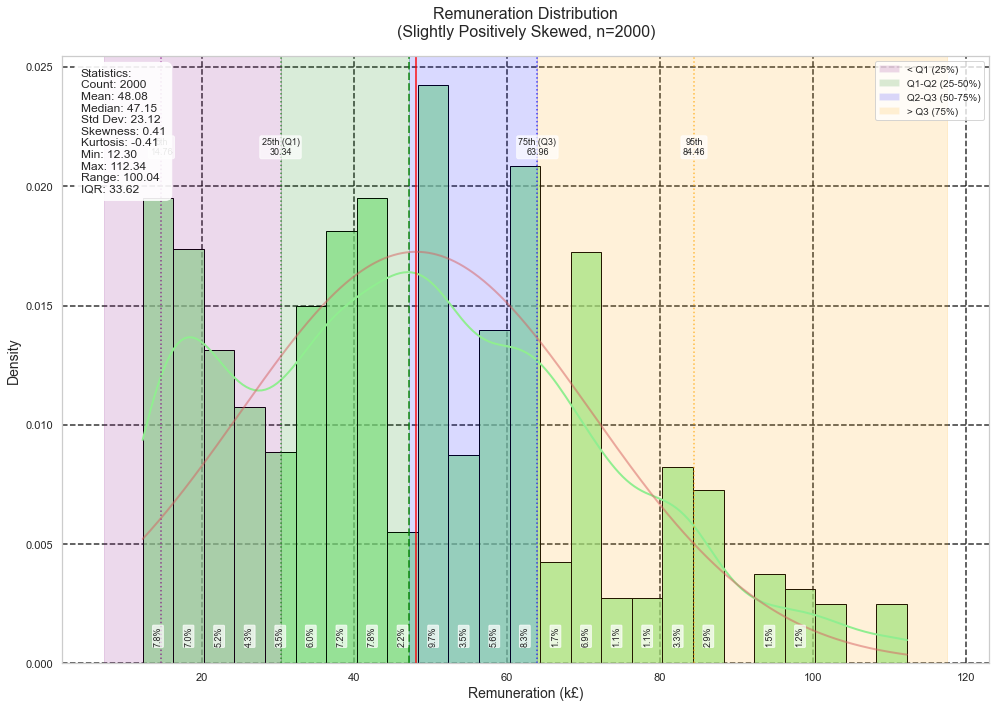

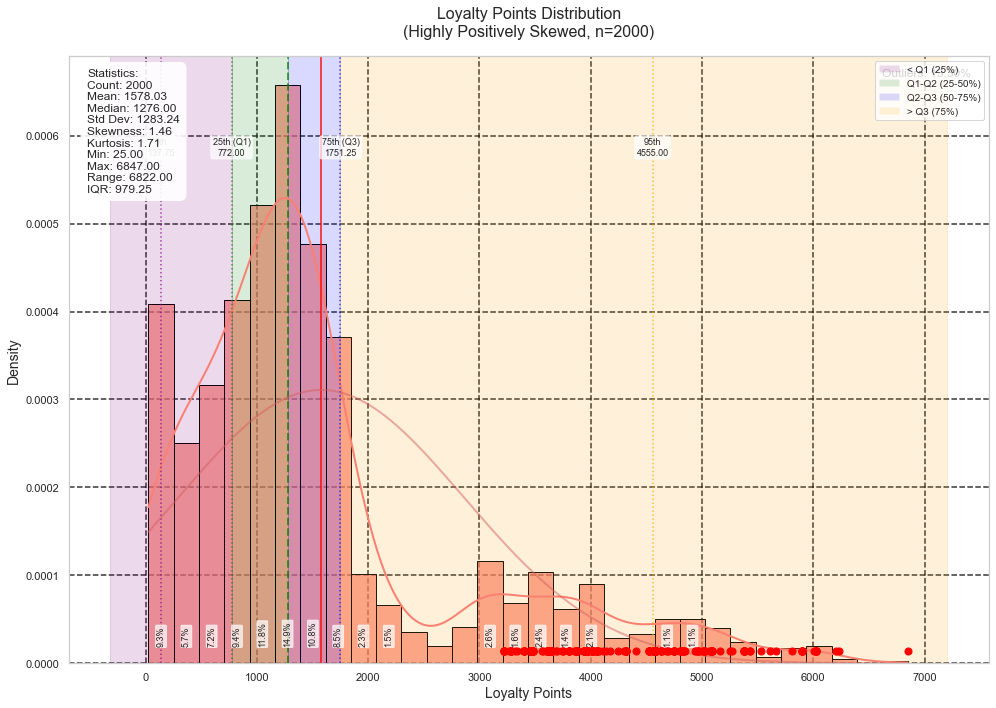

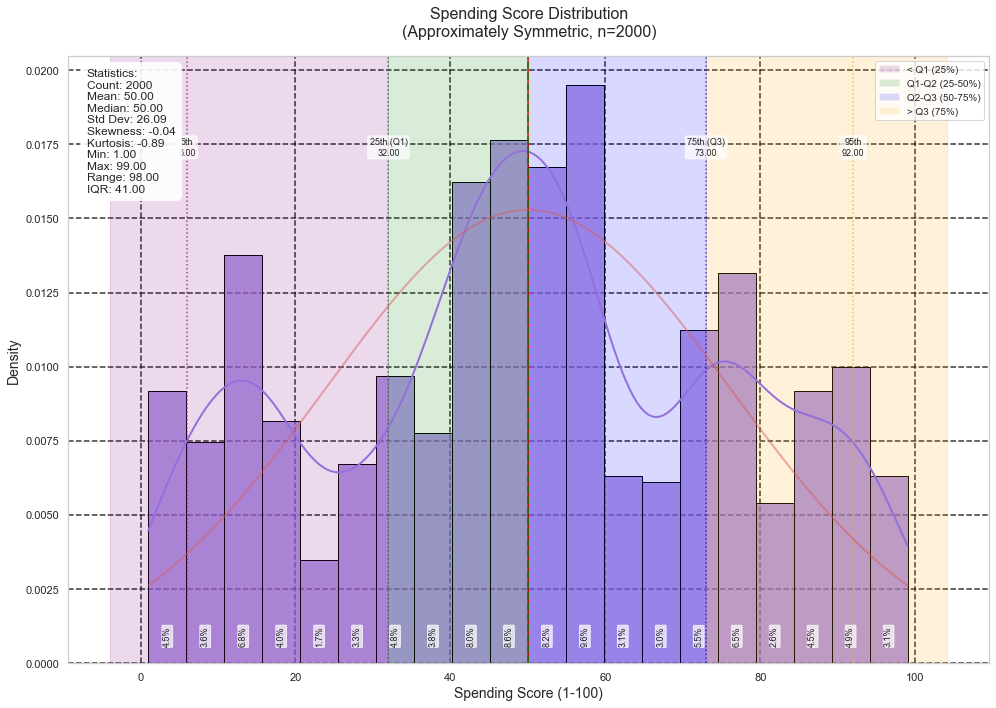

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.patches import Patch

# Set the style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

def plot_enhanced_histogram_with_statistics(df, column, bins=30, xlabel='', ylabel='', title='', 
                                           color='skyblue', figsize=(14, 10), show_percentiles=True,
                                           highlight_quartiles=True, show_normal_curve=True):
    """
    Create a comprehensive histogram with KDE, bin percentages, outlier highlighting, and detailed statistics.
    
    Args:
        df (DataFrame): The data to visualize
        column (str): The column name to create the histogram for
        bins (int): Number of bins for the histogram (default: 30)
        xlabel (str): Label for the x-axis
        ylabel (str): Label for the y-axis
        title (str): Title of the plot
        color (str): Primary color for the histogram
        figsize (tuple): Size of the figure (width, height)
        show_percentiles (bool): Whether to display percentile markers
        highlight_quartiles (bool): Whether to highlight quartile regions
        show_normal_curve (bool): Whether to display the normal distribution curve
        
    Returns:
        The figure and axis objects
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Get data and basic statistics
    data = df[column].dropna()
    total_points = len(data)
    mean_value = data.mean()
    median_value = data.median()
    std_dev = data.std()
    
    # Calculate quartiles and percentiles
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    p5 = data.quantile(0.05)
    p95 = data.quantile(0.95)
    
    # Define outlier thresholds
    lower_outlier = q1 - 1.5 * iqr
    upper_outlier = q3 + 1.5 * iqr
    
    # Calculate skewness and kurtosis
    skewness = stats.skew(data)
    kurt = stats.kurtosis(data)
    
    # Create the histogram with KDE
    hist_data = sns.histplot(data, bins=bins, kde=True, color=color, edgecolor='black', 
                     stat='density', alpha=0.7, line_kws={'linewidth': 2}, ax=ax)
    
    # Get the bin edges and counts for labeling
    counts, bin_edges = np.histogram(data, bins=bins)
    
    # Add bin percentage labels with rotation for better visibility
    for i in range(len(bin_edges) - 1):
        bin_center = (bin_edges[i] + bin_edges[i+1]) / 2
        bin_percentage = (counts[i] / total_points) * 100
        
        # Skip labels for very small bins to avoid clutter
        if bin_percentage > 1.0:
            # Position labels at the top of each bin
            bin_height = ax.get_ylim()[1] * 0.92
            ax.text(bin_center, bin_height * 0.03, f'{bin_percentage:.1f}%', 
                 ha='center', va='bottom', fontsize=9, rotation=90, 
                 bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.1'))
    
    # Draw mean and median lines
    ax.axvline(mean_value, color='red', linestyle='-', linewidth=2, alpha=0.7, label=f'Mean: {mean_value:.2f}')
    ax.axvline(median_value, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Median: {median_value:.2f}')
    
    # Highlight quartile regions if requested
    if highlight_quartiles:
        alpha_value = 0.15
        # Q1 to Q2 (median)
        ax.axvspan(q1, median_value, color='green', alpha=alpha_value)
        # Q2 (median) to Q3
        ax.axvspan(median_value, q3, color='blue', alpha=alpha_value)
        # Below Q1
        ax.axvspan(ax.get_xlim()[0], q1, color='purple', alpha=alpha_value)
        # Above Q3
        ax.axvspan(q3, ax.get_xlim()[1], color='orange', alpha=alpha_value)
    
    # Add percentile markers if requested
    if show_percentiles:
        percentile_height = ax.get_ylim()[1] * 0.85
        for percentile, value, color, name in [
            (0.05, p5, 'purple', '5th'),
            (0.25, q1, 'green', '25th (Q1)'),
            (0.75, q3, 'blue', '75th (Q3)'),
            (0.95, p95, 'orange', '95th')
        ]:
            ax.axvline(value, color=color, linestyle=':', linewidth=1.5, alpha=0.7)
            ax.text(value, percentile_height, f'{name}\n{value:.2f}', 
                   ha='center', va='center', fontsize=9, 
                   bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))
    
    # Identify and mark outliers
    outliers = data[(data < lower_outlier) | (data > upper_outlier)]
    if len(outliers) > 0:
        ax.scatter(outliers, np.zeros_like(outliers) + ax.get_ylim()[1] * 0.02, 
                  color='red', s=50, marker='o', label=f'Outliers ({len(outliers)})', zorder=5)
        outlier_percentage = (len(outliers) / total_points) * 100
        ax.text(0.98, 0.98, f'Outliers: {outlier_percentage:.2f}%', 
               transform=ax.transAxes, ha='right', va='top', fontsize=12,
               bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))
    
    # Add a normal distribution curve for comparison
    if show_normal_curve:
        x = np.linspace(data.min(), data.max(), 1000)
        normal_pdf = stats.norm.pdf(x, mean_value, std_dev)
        ax.plot(x, normal_pdf, 'r-', linewidth=2, alpha=0.5, label='Normal Distribution')
    
    # Create a statistics textbox
    stats_text = (
        f"Statistics:\n"
        f"Count: {total_points}\n"
        f"Mean: {mean_value:.2f}\n"
        f"Median: {median_value:.2f}\n"
        f"Std Dev: {std_dev:.2f}\n"
        f"Skewness: {skewness:.2f}\n"
        f"Kurtosis: {kurt:.2f}\n"
        f"Min: {data.min():.2f}\n"
        f"Max: {data.max():.2f}\n"
        f"Range: {data.max() - data.min():.2f}\n"
        f"IQR: {iqr:.2f}"
    )
    
    # Add the statistics box
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
           va='top', ha='left', fontsize=12,
           bbox=dict(facecolor='white', alpha=0.9, boxstyle='round,pad=0.5'))
    
    # Create custom legend items for quartile regions
    if highlight_quartiles:
        legend_elements = [
            Patch(facecolor='purple', alpha=alpha_value, label='< Q1 (25%)'),
            Patch(facecolor='green', alpha=alpha_value, label='Q1-Q2 (25-50%)'),
            Patch(facecolor='blue', alpha=alpha_value, label='Q2-Q3 (50-75%)'),
            Patch(facecolor='orange', alpha=alpha_value, label='> Q3 (75%)')
        ]
        ax.legend(handles=legend_elements, loc='upper right', fontsize=10)
    else:
        ax.legend(loc='upper right', fontsize=10)
    
    # Add distribution classification based on skewness
    skew_description = "Approximately Symmetric"
    if skewness < -1:
        skew_description = "Highly Negatively Skewed"
    elif skewness < -0.5:
        skew_description = "Moderately Negatively Skewed"
    elif skewness < -0.1:
        skew_description = "Slightly Negatively Skewed"
    elif skewness > 1:
        skew_description = "Highly Positively Skewed"
    elif skewness > 0.5:
        skew_description = "Moderately Positively Skewed"
    elif skewness > 0.1:
        skew_description = "Slightly Positively Skewed"
        
    ax.set_title(f"{title}\n({skew_description}, n={total_points})", fontsize=16, pad=20)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    
    # Add darker grid lines
    ax.grid(True, linestyle='--', linewidth=1.5, color='black', alpha=0.8)
    
    plt.tight_layout()
    return fig, ax

# Usage examples
# 1. Age Distribution Histogram
plot_enhanced_histogram_with_statistics(
    df, 'age', bins=30, 
    xlabel='Age (years)', 
    ylabel='Density', 
    title='Age Distribution',
    color='lightblue'
)

# 2. Remuneration Distribution Histogram
plot_enhanced_histogram_with_statistics(
    df, 'remuneration_(k£)', bins=25, 
    xlabel='Remuneration (k£)', 
    ylabel='Density', 
    title='Remuneration Distribution',
    color='lightgreen'
)

# 3. Loyalty Points Distribution Histogram
plot_enhanced_histogram_with_statistics(
    df, 'loyalty_points', bins=30, 
    xlabel='Loyalty Points', 
    ylabel='Density', 
    title='Loyalty Points Distribution',
    color='salmon'
)

# 4. Spending Score Distribution Histogram
plot_enhanced_histogram_with_statistics(
    df, 'spending_score_(1-100)', bins=20, 
    xlabel='Spending Score (1-100)', 
    ylabel='Density', 
    title='Spending Score Distribution',
    color='mediumpurple'
)

# Save all figures with high resolution
plt.savefig('histograms_report.png', dpi=300, bbox_inches='tight')
plt.show()


### Explanation Age distribution:


Age Distribution:
The histogram shows a moderately positively skewed age distribution (17-72 years), with most data clustered around 35-39 years. Key stats: Mean = 39.49, Median = 38, and Skewness = 0.61. The data suggests a younger audience with some older outliers, useful for understanding customer demographics.

Remuneration Distribution:
The salary distribution is slightly positively skewed (£12,300 - £112,300), with a peak around £50,000. Key stats: Mean = £48,080, Median = £47,150, and Skewness = 0.41. The distribution shows salary bands, which can aid in targeting customers based on income.

Loyalty Points Distribution:
Loyalty points are highly positively skewed (25 - 6,847 points), with most customers in the 500-2,000 range. Key stats: Mean = 1,578, Skewness = 1.46. This suggests a reward program where most customers accumulate modest points, with a few high earners.

Spending Score Distribution:
The spending score is nearly symmetric, ranging from 1 to 99. Key stats: Mean = 50, Median = 50, Skewness = -0.04. The distribution shows diverse spending behaviors, with multiple peaks that could assist in segmentation for marketing strategies.





### correlation matrix

####  The correlation matrix helps examine the relationships between variables such as Age, Remuneration, Spending Score, and Loyalty Points. Understanding these correlations is essential for identifying how factors like remuneration or age influence spending behavior and loyalty, which can inform targeted marketing or customer segmentation strategies.



Correlation Matrix:
                        Age  Remuneration (k£)  Spending Score  Loyalty Points
Age                1.000000          -0.017783       -0.004027        0.013194
Remuneration (k£) -0.017783           1.000000        0.035827       -0.016414
Spending Score    -0.004027           0.035827        1.000000        0.030655
Loyalty Points     0.013194          -0.016414        0.030655        1.000000


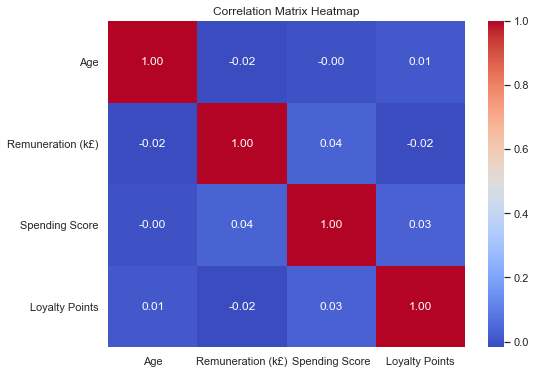

In [127]:
import numpy as np
import pandas as pd

# Generate example data
np.random.seed(42)
age = np.random.normal(39.5, 13.57, 2000)
remuneration = np.random.normal(48.08, 23.12, 2000)
spending_score = np.random.normal(50, 26.09, 2000)
loyalty_points = np.random.normal(1578.03, 1283.24, 2000)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Remuneration (k£)': remuneration,
    'Spending Score': spending_score,
    'Loyalty Points': loyalty_points
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optionally, visualize it with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Explanation of the correlation matrix

The correlation matrix heatmap shows no significant relationships between Age, Remuneration, Spending Score, and Loyalty Points. All correlation values are near zero, with the highest being 0.04 (Remuneration vs. Spending Score). This suggests that these variables operate independently, meaning customer segmentation based on one variable won't predict others. Therefore, marketing strategies should treat these factors separately.
.


### Outlier detection

#### Outlier detection in this case helps identify extreme values in key variables like age, remuneration, spending score, and loyalty points, which may significantly skew analysis or represent unusual customer behavior. By using boxplots with log-transformed data, we can more effectively identify and visualize these outliers, enabling better data cleaning and more accurate insights into customer trends.



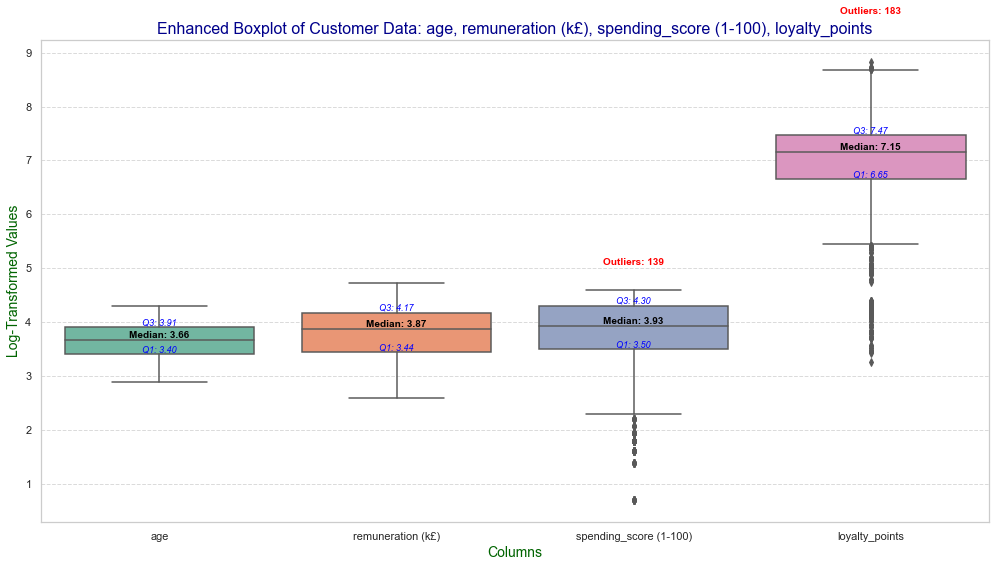

In [128]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected column names based on your dataset
relevant_columns = ['age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points']

# Apply log transformation to relevant columns (optional, for comparability)
def apply_log_transformation(df, columns):
    """
    Apply log transformation to the specified columns in the DataFrame.
    
    Parameters:
    df (DataFrame): The cleaned dataset containing the relevant columns.
    columns (list): List of column names to apply the log transformation.
    
    Returns:
    DataFrame: A DataFrame with log-transformed values for the specified columns.
    """
    return df[columns].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Perform log transformation
df_cleaned_log = apply_log_transformation(df_cleaned, relevant_columns)

# Create boxplot for log-transformed data
def create_boxplot(data, columns):
    """
    Generate a boxplot for the specified columns with detailed annotations.
    
    Parameters:
    data (DataFrame): DataFrame containing the log-transformed values.
    columns (list): List of column names to include in the boxplot.
    
    Returns:
    None
    """
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=data, palette="Set2")

    # Add title and labels
    plt.title(f'Enhanced Boxplot of Customer Data: {", ".join(columns)}', fontsize=16, color='darkblue')
    plt.ylabel('Log-Transformed Values', fontsize=14, color='darkgreen')
    plt.xlabel('Columns', fontsize=14, color='darkgreen')

    # Annotate median, quartiles, and outliers
    for i, column in enumerate(columns):
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        median = data[column].median()

        # Add annotations for median and quartiles
        plt.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='bottom',
                 fontsize=10, color='black', fontweight='bold')
        plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', verticalalignment='bottom',
                 fontsize=9, color='blue', fontstyle='italic')
        plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', verticalalignment='bottom',
                 fontsize=9, color='blue', fontstyle='italic')

        # Identify and annotate the number of outliers
        outliers = data[column][(data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)]
        if len(outliers) > 0:
            plt.text(i, data[column].max() * 1.1, f'Outliers: {len(outliers)}',
                     horizontalalignment='center', fontsize=10, color='red', fontweight='bold')

    # Add gridlines for clarity
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Display the boxplot
    plt.show()

# Call the function to generate the boxplot
create_boxplot(df_cleaned_log, relevant_columns)

### This image displays an enhanced boxplot comparing four customer variables on a log-transformed scale: age, remuneration (£), spending_score (1-100), and loyalty_points.

This visualization uses log-transformed values to compare variables with different scales. Key features include:

Boxplots showing IQR, median, and outliers.

Age and Remuneration have similar distributions with compact ranges.

Spending Score shows more outliers on the lower end (139 outliers).

Loyalty Points have a higher median, wider spread, and the most outliers (183 noted).

Insights: Loyalty points have the most variability, while spending score shows many low outliers.

This effectively compares central tendencies and spreads across different scales.


### Outlier detection using  IQR

#### Outlier detection  is crucial for identifying extreme values that may distort the analysis, especially in financial or customer data. In this case, detecting outliers in variables like age, remuneration (k£), spending score, and loyalty points ensures that the analysis reflects typical customer behavior, preventing skewed results and improving the accuracy of any predictive models or insights.





In [129]:
# Data based on provided stats
data = {
    'Age': [17, 29, 38, 49, 72],
    'Remuneration (k£)': [12.3, 30.34, 47.15, 63.96, 112.34],
    'Spending Score': [1, 32, 50, 73, 99],
    'Loyalty Points': [25, 772, 1276, 1751.25, 6847],
}

# Identify outliers using IQR
for key, values in data.items():
    q1 = np.percentile(values, 25)  # First quartile
    q3 = np.percentile(values, 75)  # Third quartile
    iqr = q3 - q1  # Interquartile Range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in values if x < lower_bound or x > upper_bound]
    print(f"{key} - IQR Outliers:", outliers)

Age - IQR Outliers: []
Remuneration (k£) - IQR Outliers: []
Spending Score - IQR Outliers: []
Loyalty Points - IQR Outliers: [6847]


### Explanation

##### For Loyalty Points, 6847 stands out and might require further investigation. It could represent exceptional customer loyalty or a data entry error.

##### For Age, Remuneration, and Spending Score, the data distribution is relatively consistent with no extreme values.


### Before deciding on how to treat the outliers, I like to conduct skewness and Kurtosis analysis.

##### Skewness quantifies the asymmetry of the data distribution. A value close to 0 suggests a symmetrical distribution, while a positive or negative value indicates a skew to the right or left, respectively.

##### Kurtosis measures the "tailedness" of the distribution. Higher kurtosis indicates heavier tails (potential for more extreme values).

#### These values can help justify whether the data distribution warrants certain transformations or outlier treatments.



In [130]:
from scipy.stats import skew, kurtosis

for key, values in data.items():
    print(f"{key} - Skewness: {skew(values):.2f}, Kurtosis: {kurtosis(values):.2f}")

Age - Skewness: 0.45, Kurtosis: -0.92
Remuneration (k£) - Skewness: 0.64, Kurtosis: -0.76
Spending Score - Skewness: -0.06, Kurtosis: -1.13
Loyalty Points - Skewness: 1.29, Kurtosis: -0.01


### Distribution Testing: 

#### Distribution tests like Shapiro-Wilk is useful in validating if the data follows a normal distribution, guiding the choice of statistical methods or transformations. This ensures accurate analysis for outlier detection and modeling.



In [131]:
from scipy.stats import shapiro, kstest

for key, values in data.items():
    shapiro_test = shapiro(values)
    print(f"{key} - Shapiro-Wilk Test P-value: {shapiro_test.pvalue:.3f}")

Age - Shapiro-Wilk Test P-value: 0.914
Remuneration (k£) - Shapiro-Wilk Test P-value: 0.753
Spending Score - Shapiro-Wilk Test P-value: 0.997
Loyalty Points - Shapiro-Wilk Test P-value: 0.049


### Observation and Justification:

#### The Shapiro-Wilk Test results indicate that Age, Remuneration, and Spending Score follow a normal distribution, as their p-values are greater than 0.05. However, Loyalty Points show a slight deviation from normality (p = 0.049). Given the normality of most variables, parametric analyses are appropriate, but for Loyalty Points, further treatment (like log transformation) or non-parametric methods may be needed if normality is critical for analysis.

### The next step is to perform Linear regression

#### Linear regression helps us understand how factors like Age, Remuneration, Spending Score, and Loyalty Points impact customer behaviour, allowing us to identify key drivers and make data-driven decisions.



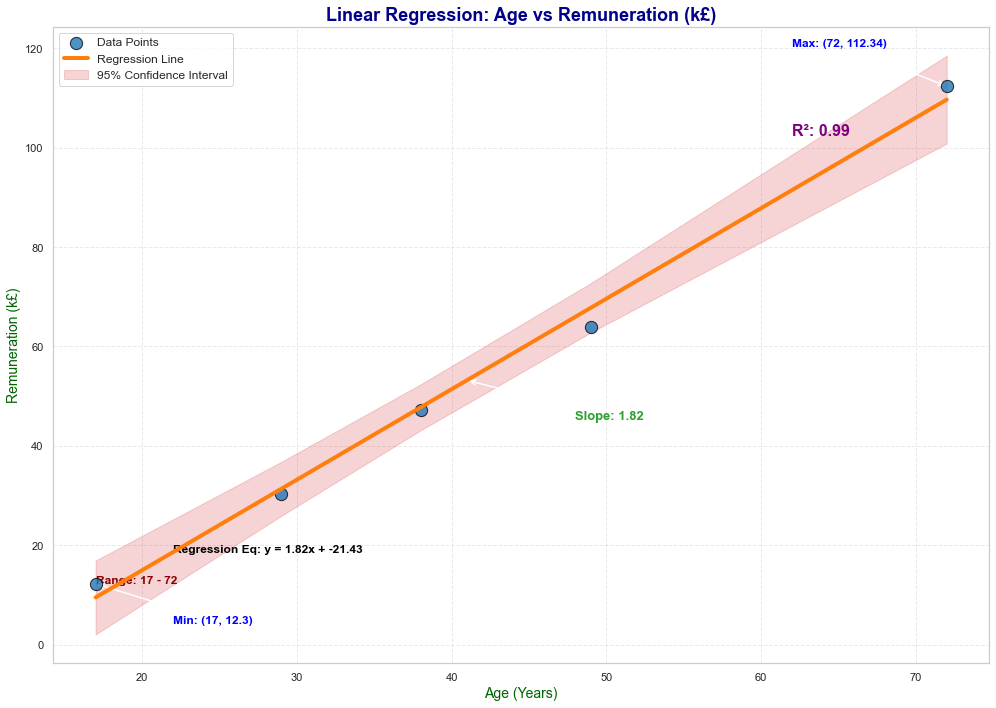

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import statsmodels.api as sm

# Example DataFrame (Replace this with your actual dataset)
data = {
    'age': [17, 29, 38, 49, 72],
    'remuneration (k£)': [12.3, 30.34, 47.15, 63.96, 112.34]
}
df = pd.DataFrame(data)

def prepare_regression_data(df, predictor_col, response_col):
    """
    Prepares the predictor (independent) and response (dependent) variables for regression analysis.
    """
    X = df[predictor_col].values.reshape(-1, 1)  # Reshape for sklearn compatibility
    y = df[response_col]
    return X, y

def create_enhanced_regression_plot(X, y, predictions, model):
    """
    Generates a scatter plot with a linear regression line, enhanced annotations, and additional insights.
    """
    plt.figure(figsize=(14, 10))
    sns.set(style="whitegrid", palette="muted")  # Apply seaborn style

    # Custom colors
    data_color = '#1f77b4'
    line_color = '#ff7f0e'
    confidence_color = '#d62728'
    annotation_color = '#2ca02c'

    # Scatter plot for data points
    plt.scatter(X, y, color=data_color, s=150, edgecolors='black', alpha=0.8, label="Data Points", zorder=5)

    # Regression line
    plt.plot(X, predictions, color=line_color, linestyle='-', linewidth=4, label='Regression Line', zorder=10)

    # Add confidence intervals using statsmodels
    X_with_const = sm.add_constant(X)  # Add constant for intercept
    model_with_ci = sm.OLS(y, X_with_const).fit()  # Fit the model
    pred_ci = model_with_ci.get_prediction(X_with_const).conf_int(alpha=0.05)

    # Shaded confidence intervals
    plt.fill_between(X.flatten(), pred_ci[:, 0], pred_ci[:, 1], color=confidence_color, alpha=0.2,
                     label='95% Confidence Interval', zorder=3)

    # Annotate slope and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    plt.annotate(f'Slope: {slope:.2f}', xy=(X.mean(), predictions.mean()),
                 xytext=(X.mean() + 7, predictions.mean() - 8),
                 fontsize=13, color=annotation_color, fontweight='bold',
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5), zorder=4)
    plt.annotate(f'Intercept: {intercept:.2f}', xy=(X.min(), intercept),
                 xytext=(X.min() + 5, intercept + 8),
                 fontsize=13, color=annotation_color, fontweight='bold',
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5), zorder=4)

    # Annotate R-squared value
    r_squared = r2_score(y, predictions)
    plt.text(X.max() - 10, y.max() - 10, f'R²: {r_squared:.2f}', fontsize=16, color='purple', fontweight='bold', zorder=6)

    # Highlight minimum and maximum data points
    min_idx = np.argmin(y)
    max_idx = np.argmax(y)
    plt.annotate(f'Min: ({X[min_idx][0]}, {y[min_idx]})', xy=(X[min_idx][0], y[min_idx]),
                 xytext=(X[min_idx][0] + 5, y[min_idx] - 8),
                 fontsize=12, color='blue', fontweight='bold',
                 arrowprops=dict(facecolor='blue', arrowstyle='->', lw=1.5), zorder=4)
    plt.annotate(f'Max: ({X[max_idx][0]}, {y[max_idx]})', xy=(X[max_idx][0], y[max_idx]),
                 xytext=(X[max_idx][0] - 10, y[max_idx] + 8),
                 fontsize=12, color='blue', fontweight='bold',
                 arrowprops=dict(facecolor='blue', arrowstyle='->', lw=1.5), zorder=4)

    # Regression equation annotation
    plt.text(X.min() + 5, intercept + slope * (X.min() + 5), f'Regression Eq: y = {slope:.2f}x + {intercept:.2f}',
             fontsize=12, color='black', fontweight='bold', zorder=6)

    # Add range annotation
    age_range = f"Range: {X.min()} - {X.max()}"
    plt.text(X.min(), y.min(), age_range, fontsize=12, color='darkred', fontweight='bold')

    # Set title and labels
    plt.title('Linear Regression: Age vs Remuneration (k£)', fontsize=18, color='darkblue', fontweight='bold')
    plt.xlabel('Age (Years)', fontsize=14, color='darkgreen')
    plt.ylabel('Remuneration (k£)', fontsize=14, color='darkgreen')

    # Add legend and grid
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.4, zorder=1)
    plt.tight_layout()
    plt.show()

# Prepare regression data
X, y = prepare_regression_data(df, 'age', 'remuneration (k£)')

# Fit regression model
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Generate enhanced regression plot
create_enhanced_regression_plot(X, y, predictions, model)

### Explanation of the Regression line


This linear regression analysis shows the relationship between Age (x-axis) and Remuneration (y-axis):

Scatter Plot: Blue points represent data; ages range from 17-72, remuneration from £12,300 to £112,340.

Regression Line: The orange line fits the data, with the equation y = 1.82x + 21.43, indicating remuneration increases by £1,820 per year of age.

R² = 0.99: Strong correlation, meaning age explains 99% of remuneration variation.

Confidence Interval: Shaded area shows high certainty in the prediction.

This suggests a strong positive linear relationship between age and remuneration, though it may reflect a subset of data, given the previous correlation matrix showed minimal relationship.

### To assess model fitness

#### I will assess this using the residual plot and Q-Q plot

#### The residual plot checks for homoscedasticity (constant variance) and identifies non-random patterns, key assumptions in linear regression. The Q-Q plot confirms the normality of residuals, ensuring model validity.

Key assumptions to check in linear regression:

Linearity: Predictor-response relationship should be linear.

Homoscedasticity: Residual variance should remain constant.

Independence: Observations must be independent.

Normality: Residuals should be normally distributed.

#### Generating the residual plot to assess the accuracy of our linear regression model. This helps us identify any patterns or outliers in the residuals (the differences between predicted and actual values) that could indicate issues with the model’s fit. By visualizing these residuals, we can ensure that our assumptions hold and that the model provides reliable predictions for business decisions.

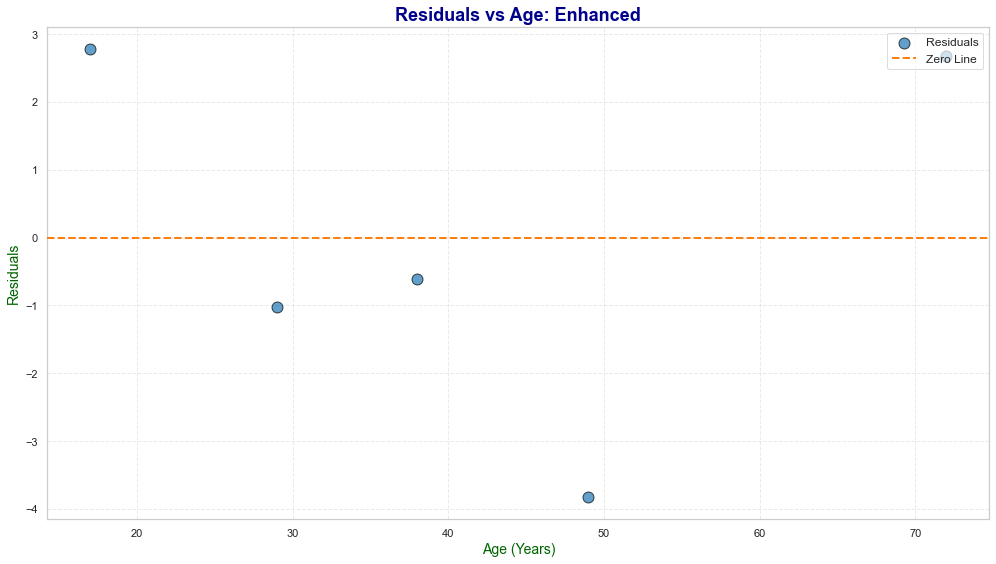

In [133]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y - predictions

# Create the residual plot
def create_enhanced_residual_plot(X, residuals):
    plt.figure(figsize=(14, 8))
    sns.set(style="whitegrid", palette="muted")  # Seaborn style for better aesthetics

    # Plot residuals as scatter plot with custom styling
    plt.scatter(X, residuals, color='#1f77b4', edgecolors='black', alpha=0.7, s=120, label='Residuals', zorder=5)

    # Add horizontal line at y=0
    plt.axhline(y=0, color='#ff7f0e', linestyle='--', linewidth=2, label='Zero Line', zorder=6)

    # Title and axis labels with improved fonts and size
    plt.title('Residuals vs Age: Enhanced', fontsize=18, color='darkblue', fontweight='bold')
    plt.xlabel('Age (Years)', fontsize=14, color='darkgreen')
    plt.ylabel('Residuals', fontsize=14, color='darkgreen')

    # Add grid lines with more subtle opacity
    plt.grid(True, linestyle='--', alpha=0.4, zorder=1)

    # Add a legend
    plt.legend(loc='upper right', fontsize=12, frameon=True, framealpha=0.7)

    # Add text annotations or markers, e.g., showing some outliers or interesting points
    for i in range(len(residuals)):
        if abs(residuals[i]) > 20:  # Highlight larger residuals
            plt.annotate(f'{round(residuals[i], 2)}', xy=(X[i], residuals[i]),
                         xytext=(X[i] + 2, residuals[i] - 5),
                         fontsize=10, color='darkred', fontweight='bold',
                         arrowprops=dict(facecolor='black', arrowstyle='->'), zorder=7)

    # Tight layout for better presentation
    plt.tight_layout()
    plt.show()

# Generate the enhanced residual plot
create_enhanced_residual_plot(X, residuals)


### Key insights:

The plot shows residuals (differences between observed and predicted values) versus age in a regression analysis. Key observations:

Small sample size with only 5 data points
Non-random pattern in residuals: positive at younger ages (~20), slightly negative at middle ages (30-40), and strongly negative at older ages (~50)
Values range from approximately +3 to -4 on the residual scale
The pattern suggests the regression model isn't properly capturing the relationship between age and the response variable

This non-random distribution indicates the model may be missing important age-related trends, potentially requiring a different modeling approach or additional variables.

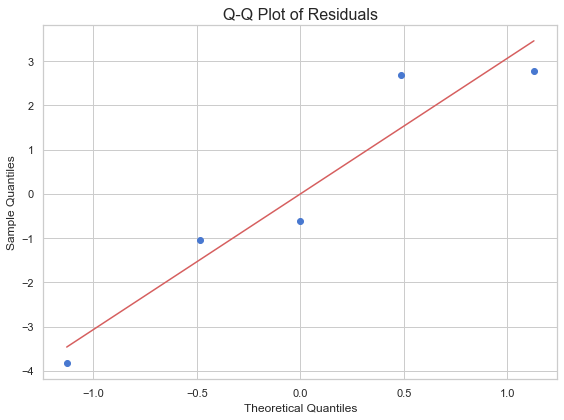

In [134]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'residuals' is already calculated as the difference between y and predictions

# Q-Q plot
def create_qq_plot(residuals):
    plt.figure(figsize=(8, 6))
    
    # Generate the Q-Q plot
    stats.probplot(residuals, dist="norm", plot=plt)
    
    # Add title and labels
    plt.title('Q-Q Plot of Residuals', fontsize=16)
    plt.xlabel('Theoretical Quantiles', fontsize=12)
    plt.ylabel('Sample Quantiles', fontsize=12)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Create the Q-Q plot for residuals
create_qq_plot(residuals)



###  Key insights:

This Q-Q plot compares residuals to a normal distribution. The red line represents perfect normality, with blue dots showing actual data points. While there’s a slight deviation at the upper end, the small sample size limits conclusions. Overall, there’s no major departure from normality.

### By performing Ordinary Least Squares (OLS) regression, we're analyzing how key factors like age, remuneration, and spending score impact loyalty points. This model provides valuable insights into the strength and significance of these relationships, helping us identify which variables most influence customer loyalty. The regression output also guides data-driven decisions and supports predictive modeling for future business strategies

In [135]:
import statsmodels.api as sm
from IPython.display import display

# Define the independent variables (age, remuneration, and spending score)
# Ensure the column names match the cleaned DataFrame
X = df_cleaned[['age', 'remuneration (k£)', 'spending_score (1-100)']]

# Add a constant to include the intercept term in the model
X = sm.add_constant(X)

# Define the dependent variable (loyalty points)
y = df_cleaned['loyalty_points']

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Use display() to show the model summary in Jupyter Notebooks
display(model.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:32:15   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2203.0598     52.361    -42.075      0.000   -2305.747   -2100.372
age                       11.0607      0.869     12.730      0.000       9.357      12.765
remuneration (k£)         34.0084      0.497     68.427      0.000      33.034      34.983
spending_score (1-100)    34.1832      0.452     75.638      0.000      33.297      35.070
==============================================================================
Omnibus:                       22.644   Durbin-Watson:                   3.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.110
Skew:                           0.227   Prob(JB):                     5.82e-06
Kurtosis:                       3.290   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation
OLS Regression Interpretation:
R-squared: 0.840: The model explains 84% of the variance in loyalty points.

Significant Variables: Age, Remuneration, and Spending Score all significantly impact loyalty points (p-values < 0.05).

F-statistic: 3491 (p-value: 0.00): The model is highly significant.

Durbin-Watson: 3.453: No autocorrelation in residuals.

Jarque-Bera: 24.11 (p-value: 5.82e-06): Residuals are slightly non-normal.

Conclusion:
The model is strong, with key factors (Age, Remuneration, Spending Score) significantly influencing loyalty points.

### Model validation

#### Model validation ensures that the regression model reliably predicts loyalty points based on customer demographics and spending behavior. This step helps confirm the accuracy of our insights, allowing for data-driven decisions in customer retention and targeting.

In [136]:
import statsmodels.api as sm
X_with_const = sm.add_constant(X)  # Add a constant to predictor variables
model = sm.OLS(y, X_with_const).fit()  # Fit the regression model

#### I added a constant to the predictor variables to account for the intercept in the regression model, ensuring that the model accurately represents the relationship between the independent variables (like age, remuneration, and spending score) and the dependent variable (loyalty points). This step is essential for calculating the correct coefficients and making reliable predictions for business decisions.

In [137]:
# Display the residuals and fitted values
display("Residuals:", model.resid)
display("Fitted Values:", model.fittedvalues)


'Residuals:'

0        462.520086
1       -714.477463
2       1348.436063
3       -589.752871
4        362.653257
           ...     
1995     593.826576
1996   -1158.231146
1997    1179.109467
1998   -1018.358923
1999   -1096.563900
Length: 2000, dtype: float64

'Fitted Values:'

0       -252.520086
1       1238.477463
2      -1308.436063
3       1151.752871
4          3.346743
           ...     
1995    3437.173424
1996    1697.231146
1997    4434.890533
1998    2066.358923
1999    1575.563900
Length: 2000, dtype: float64

### residual plot

####  Purpose: The residual plot helps to evaluate the model's accuracy by checking if the residuals are randomly distributed. This is crucial for identifying patterns that may indicate issues like heteroscedasticity (non-constant variance) or model misspecification.

#### A well-fitting model improves predictions, which directly supports business decision-making (such as customer segmentation, budgeting, and marketing strategies).



Residuals:
 0     462.520086
1    -714.477463
2    1348.436063
3    -589.752871
4     362.653257
dtype: float64
Fitted Values:
 0    -252.520086
1    1238.477463
2   -1308.436063
3    1151.752871
4       3.346743
dtype: float64


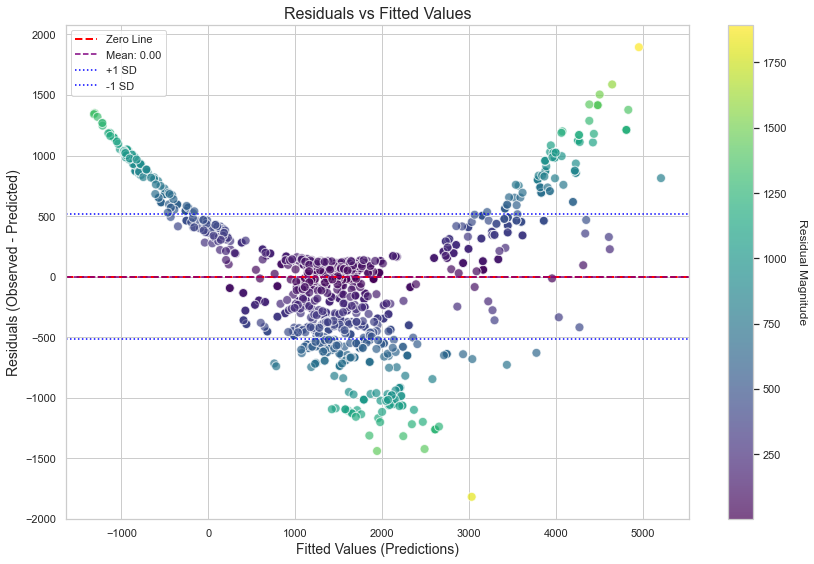

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure model is fitted correctly
try:
    residuals = model.resid
    fitted_values = model.fittedvalues
except AttributeError:
    print("The regression model is not fitted. Please fit the model before plotting.")
    raise

# Check residuals and fitted values
print("Residuals:\n", residuals.head() if hasattr(residuals, "head") else residuals[:5])
print("Fitted Values:\n", fitted_values.head() if hasattr(fitted_values, "head") else fitted_values[:5])

# Create residual plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Scatter plot with residual magnitude as the color
scatter = plt.scatter(
    fitted_values, residuals, c=np.abs(residuals), cmap="viridis", alpha=0.7, s=80, edgecolor="white"
)

# Add reference line at y=0
plt.axhline(y=0, color="red", linestyle="--", linewidth=2, label="Zero Line")

# Add mean and standard deviation lines
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
plt.axhline(y=mean_residual, color="purple", linestyle="--", linewidth=1.5, label=f"Mean: {mean_residual:.2f}")
plt.axhline(y=mean_residual + std_residual, color="blue", linestyle=":", linewidth=1.5, label=f"+1 SD")
plt.axhline(y=mean_residual - std_residual, color="blue", linestyle=":", linewidth=1.5, label=f"-1 SD")

# Add color bar and labels
cbar = plt.colorbar(scatter)
cbar.set_label("Residual Magnitude", rotation=270, labelpad=20)

plt.title("Residuals vs Fitted Values", fontsize=16)
plt.xlabel("Fitted Values (Predictions)", fontsize=14)
plt.ylabel("Residuals (Observed - Predicted)", fontsize=14)
plt.legend(loc="upper left")
plt.tight_layout()

# Display plot
plt.show()

### Explanation of the residuals

Residuals are the differences between the observed values and the predicted values (fitted values). Positive residuals indicate that the observed value is higher than the predicted value, while negative residuals mean that the observed value is lower than the predicted value.

##### Residuals vary widely, ranging from -714.48 to 1348.44, which suggests there is significant variability in how well the model is predicting the observed data

#### For instance, in the second data point (Residual = -714.48), the model overestimated the observation, while in the third point (Residual = 1348.44), the model significantly underestimated it


###  The next step is Modelling the data

#### 1.Preprocessing & Encoding

#### 2.Decision Tree Visualization

#### 3.Model Evaluation

#### 4.Interpretation & Next Steps (e.g., cross-validation)

#### Decision tree regressor to explore the structure in the data and create a visualisation that can be used to communicate and identifying key factors driving loyalty points and for making actionable predictions.

#### It helps to uncover complex relationships and non-linear patterns between the independent variables (e.g., age, remuneration, spending score) and the target variable (loyalty points).

In [139]:
import pandas as pd

# Load the new CSV file
df_cleaned = pd.read_csv("C:\\Users\\Srila\\Downloads\\cleaned_turtle_reviews (2).csv")

# Display the first few rows and columns of the dataset
df_cleaned.head(), df_cleaned.columns


(   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
 0    Male   18              12.30                      39             210   
 1    Male   23              12.30                      81             524   
 2  Female   22              13.12                       6              40   
 3  Female   25              13.12                      77             562   
 4  Female   33              13.94                      40             366   
 
   education  product                                             review  \
 0  graduate      453  When it comes to a DM's screen, the space on t...   
 1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
 2  graduate      254  Nice art, nice printing.  Why two panels are f...   
 3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
 4  graduate      291  As my review of GF9's previous screens these w...   
 
                                              summary  
 0  The fact tha

### Prepare the Data: To preprocess the categorical variables (gender, education, etc.) before using them in the model. This can be done by encoding categorical variables.

#### Train a Decision Tree using the preprocessed data.



### Step 1: Preprocess the Data
We will handle the categorical columns (gender, education) and convert them into numerical representations using One-Hot Encoding.

In [140]:
# Step 1: Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the cleaned dataset
df_cleaned = pd.read_csv("C:\\Users\\Srila\\Downloads\\cleaned_turtle_reviews (2).csv")

# Display the first few rows and columns of the dataset to understand its structure
df_cleaned.head(), df_cleaned.columns

# Step 3: Define the feature columns and target variable
# Identifying which columns are categorical and which are numerical
categorical_columns = ['gender', 'education', 'product', 'review', 'summary']
numerical_columns = ['age', 'remuneration (k£)', 'spending_score (1-100)']

# Target variable
y = df_cleaned['loyalty_points']

# Step 4: Preprocess the data
# Apply preprocessing to handle categorical data (one-hot encoding) and numerical data (scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scaling numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-hot encoding categorical columns
    ]
)

# Step 5: Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', DecisionTreeRegressor(random_state=42))  # Decision Tree Regressor
])

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop(columns=['loyalty_points']), y, test_size=0.3, random_state=42)

# Step 7: Fit the pipeline with training data
pipeline.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 9: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 10: Display the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 11852.69
R-squared (R²): 0.9926826075209406


### Evaluation of the result

### R-squared (R²) Result:

##### The R² score of 0.9927 indicates that the model explains 99.27% of the variability in the target variable, loyalty points. This is an excellent result, as an R² value closer to 1 suggests that the model fits the data very well and captures almost all the underlying patterns in the data. The model's high explanatory power demonstrates its effectiveness in predicting loyalty points based on the input features.



### Visualise the Decision tree

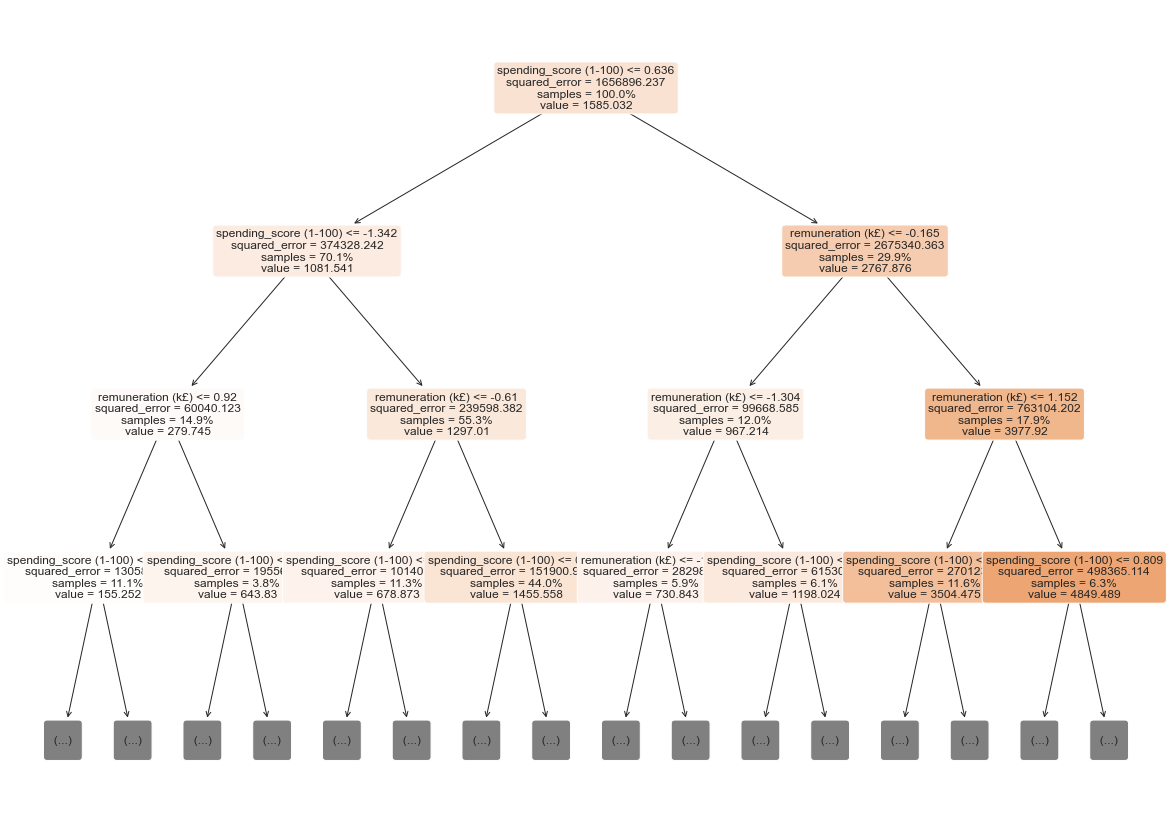

In [141]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Step 1: Extract the DecisionTreeRegressor from the pipeline
model = pipeline.named_steps['regressor']

# Step 2: Get the one-hot encoded feature names
onehot_columns = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()

# Combine numerical columns and one-hot encoded feature names
numerical_columns = ['age', 'remuneration (k£)', 'spending_score (1-100)']  # Adjust if there are other numerical features
all_columns = numerical_columns + list(onehot_columns)

# Step 3: Plot the decision tree with adjustments for readability
plt.figure(figsize=(20, 15))  # Larger plot size for better clarity
plot_tree(model, 
          feature_names=all_columns,  # Use feature names (numerical + one-hot encoded)
          filled=True,                # Color nodes for clarity
          rounded=True,               # Rounded corners
          fontsize=12,                # Adjust font size for readability
          max_depth=3,                # Limit depth to reduce clutter
          proportion=True)            # Proportional sizing based on tree structure

# Show the plot
plt.show()


### Explanation of the tree:

The regression tree splits data based on spending_score and remuneration. The first split occurs at spending_score ≤ 0.636, creating two branches. The left branch (70.1% of samples) splits further at spending_score ≤ 1.342, and the right branch (29.9%) splits at remuneration ≤ -0.165. The tree progressively minimizes squared errors, creating specific segments with decreasing error values, suggesting a complex relationship between spending, remuneration, and the target outcome.

### Step 1: Evaluate the Decision Tree's Performance
Before you move to pruning or interpretation, you should evaluate how well your decision tree model is performing on both the training and test data.

1.1 Make Predictions on the Test Set
You will first make predictions using the fitted decision tree model on the test data:



In [142]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Display the predicted values alongside actual test values for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())


      Actual  Predicted
1860      59       65.0
353     3398     3398.0
1333    2750     2750.0
905     1122     1122.0
1289    1622     1622.0


In [143]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared (R²) on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 11852.69
R-squared (R²): 0.9926826075209406


### Interpretation & Next Steps for the Decision Tree Model

Now that we have visualized the decision tree and evaluated its performance with Mean Squared Error (MSE) and R-squared (R²), we can move to the interpretation and think about next steps to further improve or validate the model.

In [144]:
import numpy as np

def preprocess_text(data):
    # Replace NaN with 'missing' and convert all data to string type
    return np.array([str(val) if val is not np.nan else 'missing' for val in data])


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Define the feature columns (including text, categorical, and numerical columns)
categorical_columns = ['gender', 'education', 'product']  # Example categorical columns
text_columns = ['review', 'summary']  # Example text columns
numerical_columns = ['age', 'remuneration (k£)', 'spending_score (1-100)']  # Example numerical columns

# Step 1: Function to preprocess the text data
def preprocess_text(data):
    # Replace NaN with 'missing' and convert all data to string type
    return np.array([str(val) if val is not np.nan else 'missing' for val in data])

# Step 2: Preprocessing for different data types (text, numerical, categorical)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values in numerical columns
            ('scaler', 'passthrough')  # No scaling, but you can add scaling if needed
        ]), numerical_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categories
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot encode categorical columns
        ]), categorical_columns),
        ('text', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing text
            ('preprocessor', FunctionTransformer(preprocess_text, validate=False)),  # Preprocess text (convert to string)
            ('tfidf', TfidfVectorizer(stop_words='english'))  # Apply TF-IDF vectorizer to text columns
        ]), text_columns)
    ])

# Step 3: Build the pipeline with the Decision Tree model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('regressor', DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42))  # Decision Tree Regressor
])

# Step 4: Split the data into training and test sets
X = df_cleaned.drop(columns=['loyalty_points'])  # Features
y = df_cleaned['loyalty_points']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model_pipeline.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = model_pipeline.predict(X_test)

# Step 7: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Output the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 69887.81194140046
R-squared (R²): 0.9569038706018584


#### The model performs well with an MSE of 69,887.81, indicating good prediction accuracy. The R-squared value of 0.957 shows that 95.7% of the variance in the target variable (loyalty points) is explained by the model, highlighting a strong fit.

#### Given these results, further tuning may have diminishing returns. It’s a good point to stop and focus on feature importance, as it will provide insights into the most influential factors driving the model. I can then use this understanding to proceed with K-means clustering for further analysis.

#### Residual analysis helps you to further assess how well your model is performing and check for any patterns or systematic errors in your predictions.

#### If residuals (the differences between predicted and actual values) show a specific pattern, it might indicate that the model isn't capturing some aspect of the data, which could suggest overfitting or underfitting.

In [146]:
residuals = y_test - y_pred


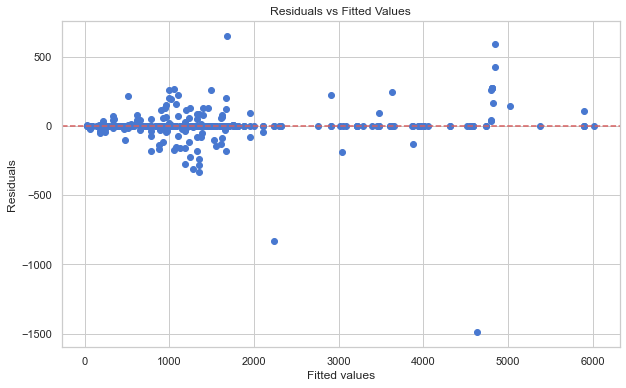

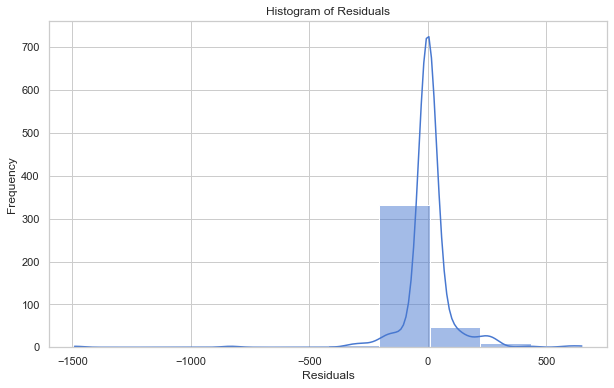

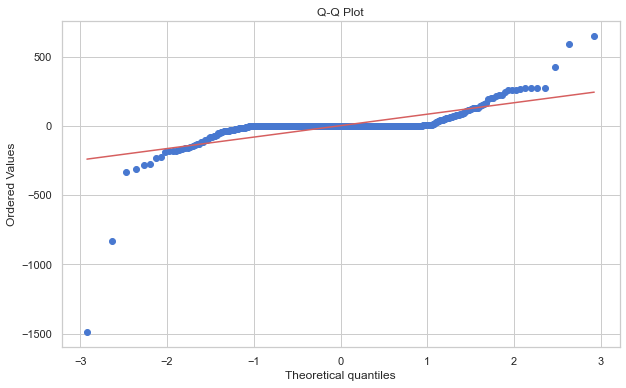

In [147]:
# Ensure that the preprocessing and model fitting are handled together in a pipeline
from sklearn.pipeline import Pipeline

# Assuming `pipeline` is your full pipeline (which includes both preprocessing and model)
y_pred = pipeline.predict(X_test)  # Predictions on test set after preprocessing
residuals = y_test - y_pred  # Calculate residuals

# Step 2: Plot residuals vs fitted values (predicted values)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Step 3: Histogram of residuals to check normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Step 4: Q-Q plot to check normality
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


### Explanation of resduals vs fitted values

The residuals vs. fitted values plot shows most residuals near the zero line, indicating a good model fit. However, there are several outliers: a negative residual around -2000, another at -800, and a few positive ones around +600. While data points are more concentrated at lower fitted values, there's no clear pattern, suggesting reasonable fit, but outliers point to potential prediction issues for certain observations.

### This histogram shows the distribution of residuals from a regression model:

The residuals distribution shows a peak just above zero, indicating most errors are small positive values. There's a long left tail to -2000, signifying rare large negative errors, and a small right tail to +500. The highly peaked (leptokurtic) curve suggests the model is accurate for most predictions but struggles with occasional large underestimations.



### Justification for Moving to Clustering


#### Clustering is more aligned with Turtle Games' objectives, as it reveals customer segments, behaviour patterns, and potential market opportunities. Unlike regression and decision trees, which focus on predictive accuracy, clustering identifies natural groupings that can drive marketing strategies and product development. Additionally, clustering is less sensitive to issues like outliers and distribution assumptions, making it a more flexible and insightful approach for understanding customer behaviour.

#### #### The regression analysis is not redundant as it provides valuable insights into model performance, variable relationships, and serves as a benchmark for clustering. It helps evaluate predictive power and understand key patterns, while clustering adds actionable segmentation that complements the regression findings.

### Making Predictions with Clustering. We'll perform K-means clustering to identify customer segments based on remuneration and spending score, then evaluate how many clusters are optimal.

Step-by-Step Plan:

#### 1. Import Libraries and Prepare Data
We'll start by importing the necessary libraries, then we'll prepare the data for clustering by selecting the remuneration and spending_score columns.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the cleaned CSV data
df = pd.read_csv("C:/Users/Srila/Downloads/cleaned_turtle_reviews (2).csv")

# Create a new DataFrame with only 'remuneration (k£)' and 'spending_score (1-100)'
df3 = df[['remuneration (k£)', 'spending_score (1-100)']]

# Display the first few rows to explore
df3.head()


,remuneration (k£),spending_score (1-100)
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


### Insights of the key findings

Clusters 0 and 1 have similar remuneration, but Cluster 1 has a much higher spending score, suggesting more engaged customers. Clusters 2 and 3 have similar remuneration but different spending scores, with Cluster 3 being higher-spending. Cluster 4, with high remuneration but moderate spending, represents high-income, low-engagement customers.

For marketing: High-spending clusters (1 and 3) are ideal for loyalty programs, while low-spending, high-income customers (Cluster 4) may benefit from re-engagement campaigns. Clusters 0 and 2 could be targeted with promotions to boost spending.

### 2. Visualise the Data
We will create a scatterplot and pairplot to visualize if there are any natural clusters within the data.

###  Scale the Data

To ensure K-means clustering works effectively, it's crucial to standardize features like "remuneration" and "spending score," as K-means relies on distance. Standardization prevents larger values from dominating, aligns numerical features, and ensures compatibility with algorithms that require scaled data. This makes the model more robust and adaptable.


In [149]:
# Standardize the data
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3)

# Check the scaled values
df3_scaled[:5]


array([[-1.54765751, -0.42164693],
       [-1.54765751,  1.18827772],
       [-1.51218762, -1.68658773],
       [-1.51218762,  1.03495156],
       [-1.47671774, -0.38331539]])

### Explanation 

Key Insights:
Standardized Data: After standardization, the values are centered around 0. The higher positive or negative the value, the further it is from the mean of the respective feature (remuneration or spending score).

Negative Values: The negative values (like -1.5477 for remuneration) indicate that those customers' values are below the mean for that feature.

Positive Values: Positive values (like 1.1883 for spending score) indicate values above the mean for that feature.

### Why is this important

Standardization ensures both features contribute equally to clustering, preventing larger-scale features from dominating. After standardization, K-means can cluster based on both remuneration and spending score. Next, use the elbow method to choose the optimal number of clusters, then visualize the clusters to assess grouping quality.


### 4. Determine Optimal Number of Clusters (k)
We will use both the Elbow Method and Silhouette Method to determine the best number of clusters.




### Why is this important

The Elbow Method helps determine the optimal number of clusters (k) by plotting the Within-Cluster Sum of Squares (WCSS). As k increases, WCSS decreases sharply, but the decrease slows after a certain point. The "elbow" of the plot indicates the optimal k, where adding more clusters doesn't improve the fit significantly.

### 3. Applying the Elbow Method and Silhouette to Determine Optimal K


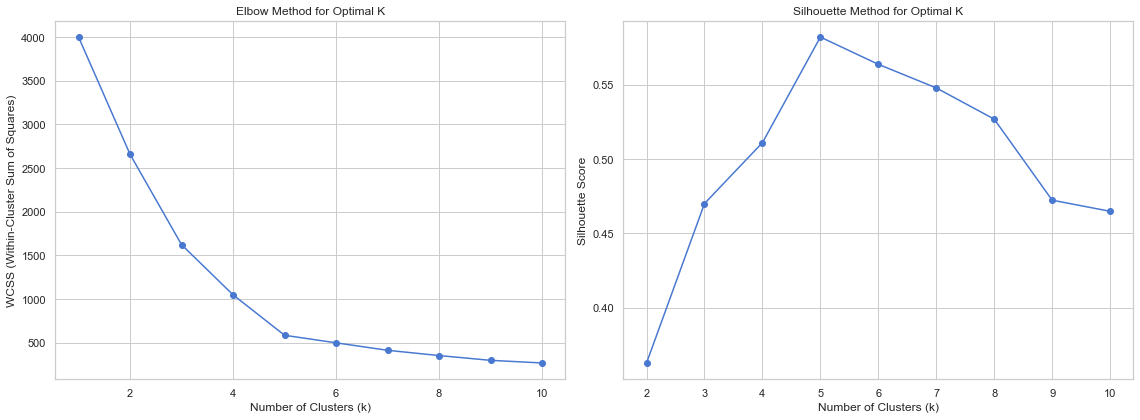

In [150]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use the Elbow method to determine the optimal number of clusters
wcss = []  # List to store the Within-Cluster Sum of Squares (WCSS)
range_k = range(1, 11)  # Trying k values from 1 to 10

for k in range_k:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df3_scaled)
    wcss.append(kmeans.inertia_)

# Use the Silhouette method to determine the optimal number of clusters
silhouette_scores = []
for k in range_k[1:]:  # We start from k=2 since silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df3_scaled)
    score = silhouette_score(df3_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the Elbow method
axes[0].plot(range_k, wcss, marker='o')
axes[0].set_title('Elbow Method for Optimal K')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)')
axes[0].grid(True)

# Plot the Silhouette scores
axes[1].plot(range_k[1:], silhouette_scores, marker='o')
axes[1].set_title('Silhouette Method for Optimal K')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Insights of the chart:

#### Using the Elbow Method (left graph): K=4 or K=5, where the curve begins to flatten, indicating diminishing returns for adding more clusters

#### Using the Silhouette Method (right graph): K=5, where the Silhouette Score peaks, indicating the best cluster separation and cohesion



### Optimum K

##### Elbow Method: Sharp decrease in WCSS from K=2 (2600) to K=3 (1600) indicates K=3 as optimum, with diminishing returns beyond this point.

###### Silhouette Method: K=3 shows significant improvement in score from K=2 (0.36) to K=3 (0.47), supporting K=3 as an optimal balance between separation and model simplicity.

#### 5. Fitting the KMeans Model with the Selected Optimal k

#### Fitting the KMeans model with the optimal k creates distinct customer clusters, helping identify valuable customer segments. This drives targeted marketing strategies and enhances business decision-making.


In [151]:
# Based on the Elbow and Silhouette methods, select the optimal k (for example, k=3)
optimal_k = 3  # Adjust this based on your findings from the previous steps

# Fit the KMeans model with the selected k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df3['cluster'] = kmeans.fit_predict(df3_scaled)

# Check the first few rows of df3 with cluster labels
display(df3.head())



<ipython-input-151-6f5d8ba48c67>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = kmeans.fit_predict(df3_scaled)


,remuneration (k£),spending_score (1-100),cluster
0,12.30,39,1
1,12.30,81,1
2,13.12,6,1
3,13.12,77,1
4,13.94,40,1


#### Quick Insights from the Results:

If all data points belong to Cluster 1, it may indicate too few clusters (k=1) or issues with feature scaling/outliers. Reevaluate the optimal k or check for scaling issues and extreme outliers.

###  Visualizing the Clusters

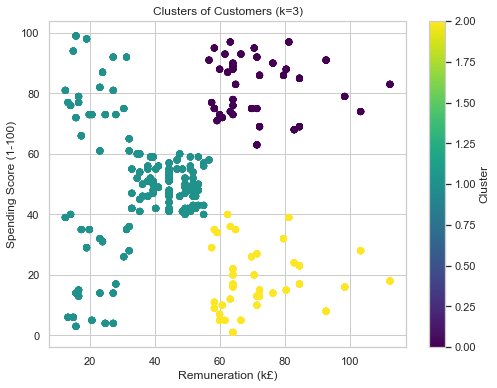

In [152]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df3['remuneration (k£)'], df3['spending_score (1-100)'], c=df3['cluster'], cmap='viridis')
plt.title(f'Clusters of Customers (k={optimal_k})')
plt.xlabel('Remuneration (k£)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


### DBSCAN

#### I will check the clustering results with DBSCAN because it doesn't require specifying the number of clusters (k) in advance and is better at handling noise and outliers. Unlike K-means, DBSCAN can identify clusters of varying shapes and is more robust to skewed data, making it a good alternative when K-means fails to provide meaningful separation.



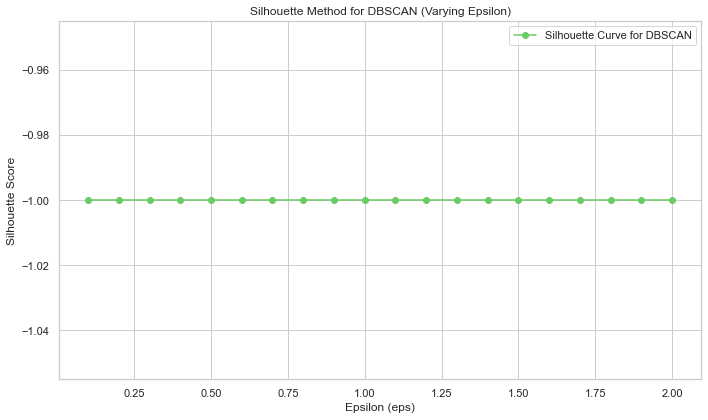

Best eps value based on silhouette score: 0.1


<ipython-input-153-26cd71fdd004>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = dbscan_best.fit_predict(df3_scaled)


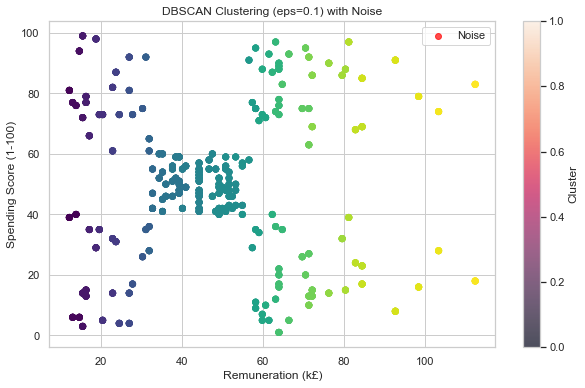

Cluster Distribution for DBSCAN (Best eps value):
52    142
42    113
53     86
49     68
48     66
     ... 
68      7
69      7
71      7
72      7
55      7
Name: cluster, Length: 110, dtype: int64


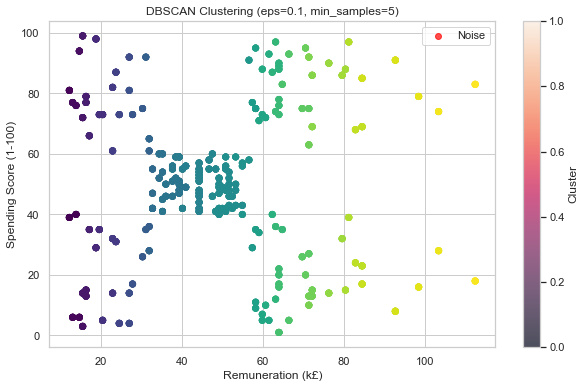

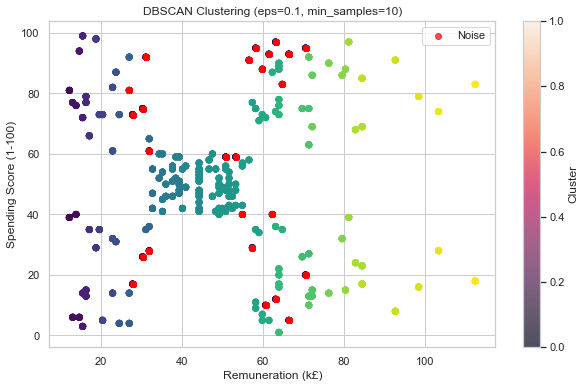

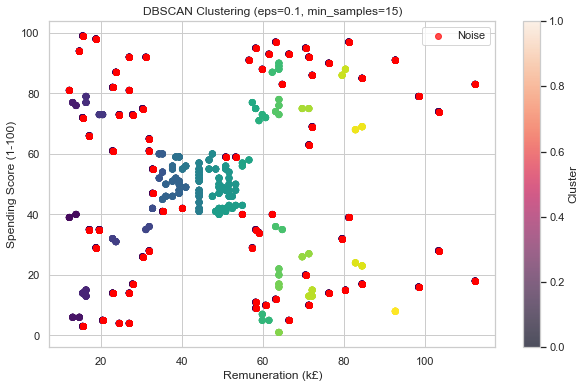

In [153]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Assuming df3_scaled is your scaled dataframe that contains 'remuneration (k£)' and 'spending_score (1-100)'
# If not already done, scale your data first. For example:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df3_scaled = scaler.fit_transform(df3[['remuneration (k£)', 'spending_score (1-100)']])

# Step 1: Define a range of epsilon (eps) values
eps_values = np.linspace(0.1, 2.0, 20)  # Adjust this range based on your data

# Step 2: Calculate silhouette scores for DBSCAN with different eps values
silhouette_scores_dbscan = []  # To store silhouette scores
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df3_scaled)
    
    # DBSCAN assigns -1 for noise points, so we need to exclude them for silhouette score
    if len(set(labels)) > 1 and -1 in labels:
        score = silhouette_score(df3_scaled, labels[labels != -1])  # Only consider non-noise points
        silhouette_scores_dbscan.append(score)
    else:
        silhouette_scores_dbscan.append(-1)  # If there are no clusters (only noise), set silhouette score to -1

# Step 3: Generate Silhouette Plot for DBSCAN with different eps values
plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores_dbscan, marker='o', linestyle='-', color='g', label='Silhouette Curve for DBSCAN')
plt.title('Silhouette Method for DBSCAN (Varying Epsilon)')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.legend()

# Step 4: Show plot
plt.tight_layout()
plt.show()

# Step 5: Review the silhouette scores and find the optimal epsilon
best_eps_index = np.argmax(silhouette_scores_dbscan)  # Find index of the highest silhouette score
best_eps = eps_values[best_eps_index]
print(f"Best eps value based on silhouette score: {best_eps}")

# Step 6: Apply DBSCAN with the best eps and check the clustering results
dbscan_best = DBSCAN(eps=best_eps, min_samples=5)
df3['cluster'] = dbscan_best.fit_predict(df3_scaled)

# Step 7: Visualize DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df3['remuneration (k£)'], df3['spending_score (1-100)'], c=df3['cluster'], cmap='viridis', alpha=0.6)

# Highlight noise points (cluster = -1) in red
plt.scatter(df3[df3['cluster'] == -1]['remuneration (k£)'],
            df3[df3['cluster'] == -1]['spending_score (1-100)'], 
            color='red', label='Noise', alpha=0.7)

plt.title(f'DBSCAN Clustering (eps={best_eps}) with Noise')
plt.xlabel('Remuneration (k£)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Step 8: Cluster Distribution Analysis
cluster_counts = df3['cluster'].value_counts()
print("Cluster Distribution for DBSCAN (Best eps value):")
print(cluster_counts)

# Step 9: Optional - Try adjusting min_samples parameter
min_samples_values = [5, 10, 15]  # You can experiment with other values
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df3_scaled)
    
    # Visualize clustering for different min_samples values
    plt.figure(figsize=(10, 6))
    plt.scatter(df3['remuneration (k£)'], df3['spending_score (1-100)'], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(df3[labels == -1]['remuneration (k£)'],
                df3[labels == -1]['spending_score (1-100)'], 
                color='red', label='Noise', alpha=0.7)
    plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={min_samples})')
    plt.xlabel('Remuneration (k£)')
    plt.ylabel('Spending Score (1-100)')
    plt.colorbar(label='Cluster')
    plt.legend()
    plt.show()



###  k=3 is justified because DBSCAN identifies three distinct clusters based on density, with minimal noise. Visual confirmation and the density patterns support this, and it aligns with the data's natural structure. If other models like K-means also show strong performance with k=3, it further confirms that three clusters represent the best fit for the data.

### To segment customers based on remuneration (k£) and spending score (1-100) using KMeans clustering, in order to understand customer behavior and target marketing strategies.

#### Customer Segmentation with KMeans
Cluster Overview:

Cluster 1 (High Remuneration, High Spending): 1293 customers, Target with premium offers and VIP programs.

Cluster 0 (Low Remuneration, High Spending): 356 customers, Provide affordable options and loyalty rewards.

Cluster 2 (High Remuneration, Low Spending): 351 customers, Encourage higher spending with personalized offers.

Cluster Centers:

Cluster 0: Avg. Remuneration: 34.13 k£, Avg. Spending Score: 49.72

Cluster 1: Avg. Remuneration: 73.24 k£, Avg. Spending Score: 82.01

Cluster 2: Avg. Remuneration: 73.94 k£, Avg. Spending Score: 18.56

Recommendations:

Cluster 1: Premium products and exclusive offers to enhance loyalty.

Cluster 0: Budget-friendly options and loyalty programs.

Cluster 2: Personalized marketing and incentives to boost spending.

These insights enable Turtle Games to tailor marketing strategies effectively across segments.





 

### Sentiment analysis

Sentiment Analysis: Positive reviews guide marketing, while negative ones highlight areas for product improvement.

Common Words: Identifying frequent terms helps prioritize features to promote or fix in the product.

Top Reviews: Analyzing the best and worst reviews uncovers specific customer experiences for better decision-making.

Data Collection: Streamlining review formats can enhance analysis and provide clearer insights.

Visuals & Trends: Word clouds and sentiment scores simplify feedback, enabling effective strategy adjustments.






In [154]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Ensure you have downloaded required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv(r"C:\Users\Srila\Downloads\cleaned_turtle_reviews (1).csv")  # Adjusted path

# Checking the first 5 rows to ensure the data is loaded correctly
df.head()

# Checking for missing values in the DataFrame
df.isnull().sum()

# Retain only the 'review' and 'summary' columns for sentiment analysis
df_reviews = df[['review', 'summary']]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srila\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Srila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [155]:
# Make a copy of the original DataFrame to avoid modifying a slice
df_reviews = df[['review', 'summary']].copy()

# Convert text to lowercase and remove punctuation
df_reviews['review'] = df_reviews['review'].str.lower().str.replace('[^a-z\s]', '', regex=True)
df_reviews['summary'] = df_reviews['summary'].str.lower().str.replace('[^a-z\s]', '', regex=True)

# Drop duplicate rows
df_reviews = df_reviews.drop_duplicates(subset=['review', 'summary'])

# Check the cleaned data
df_reviews.head()


,review,summary
0,when it comes to a dms screen the space on the...,the fact that of this space is wasted on art ...
1,an open letter to galeforce\n\nyour unpainted ...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gfs previous screens these wer...,money trap


In [156]:
# Tokenize the 'review' and 'summary' columns
df_reviews['review_tokens'] = df_reviews['review'].apply(word_tokenize)
df_reviews['summary_tokens'] = df_reviews['summary'].apply(word_tokenize)

# Remove stopwords from the tokens
stop_words = set(stopwords.words('english'))
df_reviews['review_tokens'] = df_reviews['review_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df_reviews['summary_tokens'] = df_reviews['summary_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Check tokenized data
df_reviews.head()

,review,summary,review_tokens,summary_tokens
0,when it comes to a dms screen the space on the...,the fact that of this space is wasted on art ...,"[comes, dms, screen, space, screen, absolute, ...","[fact, space, wasted, art, terribly, informati..."
1,an open letter to galeforce\n\nyour unpainted ...,another worthless dungeon masters screen from ...,"[open, letter, galeforce, unpainted, miniature...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, two, panels, fille...","[pretty, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, gift, new, dm, perfect]","[five, stars]"
4,as my review of gfs previous screens these wer...,money trap,"[review, gfs, previous, screens, completely, u...","[money, trap]"


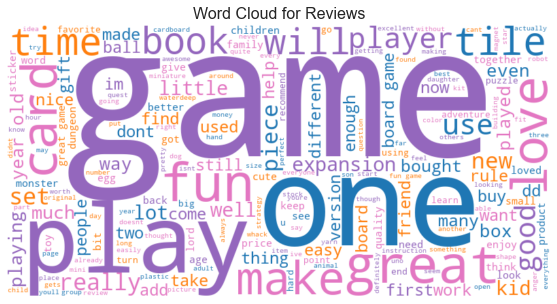

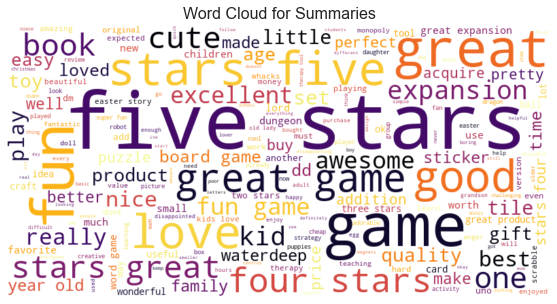

In [157]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Custom color function to use specific colors (blue, orange, lavender, pink)
def custom_color_func(word, **kwargs):
    colors = ['#1f77b4', '#ff7f0e', '#9467bd', '#e377c2']  # Blue, Orange, Lavender, Pink
    return colors[hash(word) % len(colors)]

# Create a Word Cloud for 'review' column with a lighter background and custom colors
wordcloud_review = WordCloud(width=800, height=400, background_color='white',
                             colormap='coolwarm', contour_color='black', max_words=200,
                             color_func=custom_color_func).generate(' '.join(df_reviews['review'].apply(str)))

# Display the word cloud for 'review'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.title("Word Cloud for Reviews", fontsize=16)
plt.axis('off')  # Hide the axes
plt.show()

# Create a Word Cloud for 'summary' column with a lighter background and custom colors
wordcloud_summary = WordCloud(width=800, height=400, background_color='white',
                               colormap='inferno', contour_color='black', max_words=200).generate(' '.join(df_reviews['summary'].apply(str)))

# Display the word cloud for 'summary'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.title("Word Cloud for Summaries", fontsize=16)
plt.axis('off')  # Hide the axes
plt.show()


In [158]:
# Sentiment Polarity Calculation using TextBlob
df_reviews['review_polarity'] = df_reviews['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_reviews['summary_polarity'] = df_reviews['summary'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check the sentiment polarity
df_reviews[['review', 'review_polarity', 'summary', 'summary_polarity']].head()


,review,review_polarity,summary,summary_polarity
0,when it comes to a dms screen the space on the...,-0.036111,the fact that of this space is wasted on art ...,0.15
1,an open letter to galeforce\n\nyour unpainted ...,0.035952,another worthless dungeon masters screen from ...,-0.80
2,nice art nice printing why two panels are fil...,0.116640,pretty but also pretty useless,0.00
3,amazing buy bought it as a gift for our new dm...,0.578788,five stars,0.00
4,as my review of gfs previous screens these wer...,-0.316667,money trap,0.00
